In [ ]:
import pandas as pd
import numpy as np
import tensorflow as t
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline










In [ ]:
dataset=pd.read_csv("drebin-215-dataset-5560malware-9476-benign.csv")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15036 entries, 0 to 15035
Columns: 216 entries, transact to class
dtypes: int64(214), object(2)
memory usage: 24.8+ MB


C:\Users\velsu\AppData\Local\Temp\ipykernel_23324\499410513.py:1: DtypeWarning: Columns (92) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset=pd.read_csv("drebin-215-dataset-5560malware-9476-benign.csv")


In [ ]:
dataset.describe()

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,SET_ORIENTATION,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS
count,15036.000000,15036.000000,15036.000000,15036.000000,15036.000000,15036.000000,15036.000000,15036.000000,15036.000000,15036.000000,...,15036.000000,15036.000000,15036.000000,15036.000000,15036.000000,15036.000000,15036.000000,15036.000000,15036.000000,15036.000000
mean,0.426443,0.446595,0.442671,0.413208,0.444932,0.486898,0.236632,0.330806,0.282389,0.312583,...,0.007050,0.233307,0.017425,0.004256,0.434424,0.666135,0.290835,0.016028,0.007050,0.044959
std,0.494576,0.497156,0.496719,0.492426,0.496975,0.499845,0.425029,0.470519,0.450177,0.463561,...,0.083669,0.422950,0.130852,0.065105,0.495698,0.471608,0.454163,0.125588,0.083669,0.207220
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Converting data to numeric for ML & Missing Values treatment
#Type Conversion (Label Encoding)
#convert categorical columns into numerical ones

classes,count = np.unique(dataset['class'],return_counts=True)
lbl_enc = LabelEncoder()
print(lbl_enc.fit_transform(classes),classes)

dataset = dataset.replace(classes,lbl_enc.fit_transform(classes))


#Dataset contains special characters like ''?' . Set them to NaN and use dropna() to remove them
dataset=dataset.replace('[?]',np.NaN,regex=True)
print("Total missing values : ",sum(list(dataset.isna().sum())))
dataset.dropna(inplace=True)
for c in dataset.columns:
   dataset[c] = pd.to_numeric(dataset[c])
dataset
print("Total missing values after treatment: ",sum(list(dataset.isna().sum())))

[0 1] ['B' 'S']
Total missing values :  5
Total missing values after treatment:  0


C:\Users\velsu\AppData\Local\Temp\ipykernel_23324\2275531700.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset = dataset.replace(classes,lbl_enc.fit_transform(classes))


In [ ]:
#Total Features
print("Total Features : ",len(dataset.columns)-1)

Total Features :  215


c:\Users\velsu\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step
376/376 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step


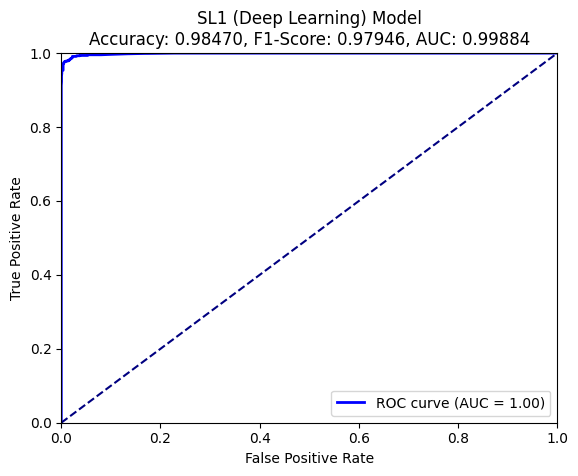

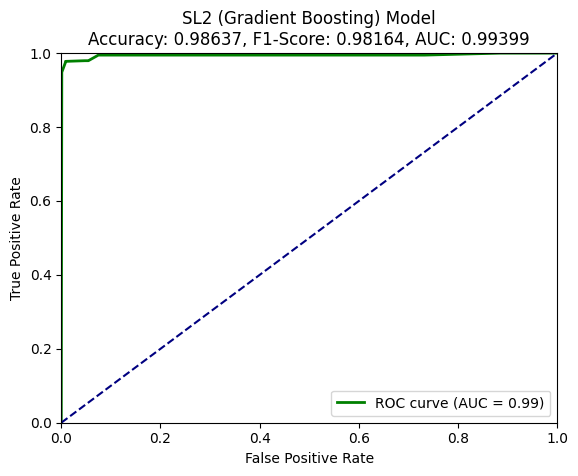


Final Results (Table 4):
                      Model       AUC  Accuracy  F1-Score
0       Logistic Regression  0.994425  0.977054  0.969292
1             Random Forest  0.998701  0.987695  0.983311
2         Gradient Boosting  0.994938  0.974726  0.965580
3             Deep Learning  0.996497  0.984370  0.978952
4   SL1: DL as meta-learner  0.998843  0.984702  0.979464
5  SL2: GBM as meta-learner  0.993988  0.986365  0.981639


In [ ]:
# Replace '?' with NaN and handle missing values
dataset.replace('?', np.nan, inplace=True)
dataset.dropna(inplace=True)  # Drop rows with NaN values

# If there are any categorical features, encode them
X = pd.get_dummies(dataset.iloc[:, :-1], drop_first=True).values

# Encode the target variable if it's categorical
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(dataset.iloc[:, -1].values)  # Convert labels to 0, 1, etc.

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Define Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Define Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Define Deep Learning model
def create_dl_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train the deep learning model
dl_model = create_dl_model()
dl_model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)

# Predict with the deep learning model
y_pred_dl = dl_model.predict(X_test)

# Create SL1 Stacking model with DL as the meta-learner
sl1_estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42))
]

# Note: For stacking, we use only sklearn models. We can't include the DL model directly in stacking.
# Instead, we'll make predictions from the DL model and add them as a feature for meta-learner training.
dl_train_pred = dl_model.predict(X_train)
dl_test_pred = dl_model.predict(X_test)

# Add DL predictions as a new feature
X_train_sl1 = np.column_stack((X_train, dl_train_pred))
X_test_sl1 = np.column_stack((X_test, dl_test_pred))

sl1_model = StackingClassifier(estimators=sl1_estimators, final_estimator=LogisticRegression())
sl1_model.fit(X_train_sl1, y_train)

# Create SL2 Stacking model with GBM as the meta-learner
sl2_estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
]

X_train_sl2 = np.column_stack((X_train, dl_train_pred))
X_test_sl2 = np.column_stack((X_test, dl_test_pred))

sl2_model = StackingClassifier(estimators=sl2_estimators, final_estimator=GradientBoostingClassifier(n_estimators=100, random_state=42))
sl2_model.fit(X_train_sl2, y_train)

# Define the models dictionary
models = {
    'Logistic Regression': lr_model,
    'Random Forest': rf_model,
    'Gradient Boosting': gb_model,
    'Deep Learning': dl_model,  # We'll handle this separately for DL
    'SL1: DL as meta-learner': sl1_model,
    'SL2: GBM as meta-learner': sl2_model
}

# Evaluate the models and store results
results = []

for name, model in models.items():
    if name == 'Deep Learning':
        y_pred = y_pred_dl
    else:
        y_pred = model.predict_proba(X_test_sl1 if 'SL1' in name else (X_test_sl2 if 'SL2' in name else X_test))[:, 1]

    accuracy = accuracy_score(y_test, (y_pred > 0.5).astype(int))
    f1 = f1_score(y_test, (y_pred > 0.5).astype(int))
    roc_auc = roc_auc_score(y_test, y_pred)

    results.append({
        'Model': name,
        'AUC': roc_auc,
        'Accuracy': accuracy,
        'F1-Score': f1
    })

    # ROC curve data
    if name == 'SL1: DL as meta-learner':
        fpr_sl1, tpr_sl1, _ = roc_curve(y_test, y_pred)
        roc_auc_sl1 = roc_auc
        accuracy_sl1 = accuracy
        f1_sl1 = f1
    elif name == 'SL2: GBM as meta-learner':
        fpr_sl2, tpr_sl2, _ = roc_curve(y_test, y_pred)
        roc_auc_sl2 = roc_auc
        accuracy_sl2 = accuracy
        f1_sl2 = f1

# Plot ROC curve for SL1
plt.figure()
plt.plot(fpr_sl1, tpr_sl1, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_sl1)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SL1 (Deep Learning) Model\nAccuracy: {:.5f}, F1-Score: {:.5f}, AUC: {:.5f}'.format(accuracy_sl1, f1_sl1, roc_auc_sl1))
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve for SL2
plt.figure()
plt.plot(fpr_sl2, tpr_sl2, color='green', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_sl2)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SL2 (Gradient Boosting) Model\nAccuracy: {:.5f}, F1-Score: {:.5f}, AUC: {:.5f}'.format(accuracy_sl2, f1_sl2, roc_auc_sl2))
plt.legend(loc="lower right")
plt.show()

# Convert results to a DataFrame and display
results_df = pd.DataFrame(results)
print("\nFinal Results (Table 4):")
print(results_df)


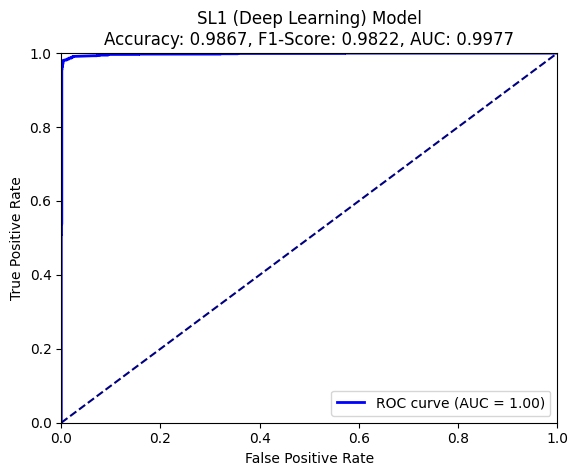

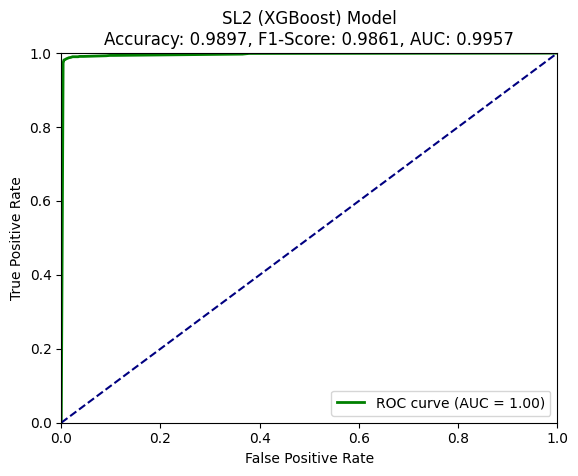


Final Results (Table 4):
                          Model       AUC  Accuracy  F1-Score
0           Logistic Regression  0.994425  0.977054  0.969292
1                           SVM  0.996253  0.983372  0.977538
2                       XGBoost  0.998446  0.987695  0.983386
3                 Deep Learning  0.996497  0.984370  0.978952
4       SL1: DL as meta-learner  0.997667  0.986698  0.982159
5  SL2: XGBoost as meta-learner  0.995673  0.989691  0.986105


In [ ]:
from sklearn.svm import SVC
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")

# Define SVM model
svm_model = SVC(probability=True, random_state=42)

# Define XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Fit SVM and XGBoost models before using them in stacking or evaluation
svm_model.fit(X_train, y_train)  # Fit SVM model
xgb_model.fit(X_train, y_train)  # Fit XGBoost model

# Create SL1 Stacking model with DL as the meta-learner
sl1_estimators = [
    ('svm', SVC(probability=True, random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
]

# Add DL predictions as a new feature for stacking
X_train_sl1 = np.column_stack((X_train, dl_train_pred))
X_test_sl1 = np.column_stack((X_test, dl_test_pred))

sl1_model = StackingClassifier(estimators=sl1_estimators, final_estimator=LogisticRegression())
sl1_model.fit(X_train_sl1, y_train)

# Create SL2 Stacking model with GBM as the meta-learner
sl2_estimators = [
    ('svm', SVC(probability=True, random_state=42))
]

X_train_sl2 = np.column_stack((X_train, dl_train_pred))
X_test_sl2 = np.column_stack((X_test, dl_test_pred))

sl2_model = StackingClassifier(estimators=sl2_estimators, final_estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
sl2_model.fit(X_train_sl2, y_train)

# Define the models dictionary
models = {
    'Logistic Regression': lr_model,
    'SVM': svm_model,
    'XGBoost': xgb_model,
    'Deep Learning': dl_model,  # We'll handle this separately for DL
    'SL1: DL as meta-learner': sl1_model,
    'SL2: XGBoost as meta-learner': sl2_model
}

# Evaluate the models and store results
results = []

for name, model in models.items():
    if name == 'Deep Learning':
        y_pred = y_pred_dl
    else:
        y_pred = model.predict_proba(X_test_sl1 if 'SL1' in name else (X_test_sl2 if 'SL2' in name else X_test))[:, 1]

    accuracy = accuracy_score(y_test, (y_pred > 0.5).astype(int))
    f1 = f1_score(y_test, (y_pred > 0.5).astype(int))
    roc_auc = roc_auc_score(y_test, y_pred)

    results.append({
        'Model': name,
        'AUC': roc_auc,
        'Accuracy': accuracy,
        'F1-Score': f1
    })

    # ROC curve data
    if name == 'SL1: DL as meta-learner':
        fpr_sl1, tpr_sl1, _ = roc_curve(y_test, y_pred)
        roc_auc_sl1 = roc_auc
        accuracy_sl1 = accuracy
        f1_sl1 = f1
    elif name == 'SL2: XGBoost as meta-learner':
        fpr_sl2, tpr_sl2, _ = roc_curve(y_test, y_pred)
        roc_auc_sl2 = roc_auc
        accuracy_sl2 = accuracy
        f1_sl2 = f1

# Plot ROC curve for SL1
plt.figure()
plt.plot(fpr_sl1, tpr_sl1, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_sl1)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SL1 (Deep Learning) Model\nAccuracy: {:.4f}, F1-Score: {:.4f}, AUC: {:.4f}'.format(accuracy_sl1, f1_sl1, roc_auc_sl1))
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve for SL2
plt.figure()
plt.plot(fpr_sl2, tpr_sl2, color='green', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_sl2)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SL2 (XGBoost) Model\nAccuracy: {:.4f}, F1-Score: {:.4f}, AUC: {:.4f}'.format(accuracy_sl2, f1_sl2, roc_auc_sl2))
plt.legend(loc="lower right")
plt.show()

# Convert results to a DataFrame and display
results_df = pd.DataFrame(results)
print("\nFinal Results (Table 4):")
print(results_df)